## > Gerando data sensível falsa.

In [17]:
from gen_fake_csv_data import SensitiveDataGenerator

sensitive_data_gen = SensitiveDataGenerator('pt_BR')
#sensitive_data_gen.write_csv_data_sensitive_only(name="dados_sensiveis_treino.csv", title=['Dado A', 'Dado B', 'Dado C', 'tipo de dado'], size=1000)
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_teste.csv", title=['Dado A', 'Dado B', 'Dado C', 'tipo de dado'], size=1000)
# sensitive_data_gen.write_csv_data_sensitive_only(size=30)

### Imports de bibliotecas importantes

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import tensorflow as tf
import pandas as pd
import numpy as np

from plot_history_helper import plot_history_accuracy, plot_history_loss
from tensorflow import keras
from keras.backend import clear_session
from sklearn import preprocessing

# clear_session() -> limpa os pesos da antiga analise

## > Lendo CSV e criando dados de teste e treino

### Dados de treinamento

In [3]:
# SEÇÃO TREINAMENTO
# Lendo dados de entrada.
# Dados sensíveis e não sensíveis na mesma database.
X_train = pd.read_csv("./dados_sensiveis_aleatorio.csv")
X_train.fillna(X_train.mean(), inplace=True)

columns = list(X_train)
print(X_train)

# Categorizando.
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = pd.Categorical(pd.factorize(X_train[i])[0])

print(X_train)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = le.fit_transform(X_train[i])

y_train = X_train["tipo de dado"]
X_train.drop(["tipo de dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X_train = X_train.values
y_train = y_train.values

# Tamanhos das entradas.
x_size:int = X_train.size
y_size:int = y_train.size

print(X_train, x_size)
# FIM SESSÃO TREINAMENTO

                     Dado A            Dado B  \
0    Gustavo Henrique Pires     Android 2.3.4   
1          João Pedro Souza     Android 3.2.6   
2             Lívia Peixoto      675988235130   
3           Francisco Pinto  6011570386264416   
4               Julia Silva     4379450983931   
..                      ...               ...   
164          Juliana Aragão      676274897005   
165           Clara Ribeiro  2714097944621712   
166            Sophie Gomes   370948288984604   
167     João Gabriel Campos     Android 5.0.2   
168            Erick da Luz     Android 7.1.2   

                                  Dado C  tipo de dado  
0                                 Barman             0  
1    Contramestre em transporte marítimo             0  
2                           41 7143 1700             1  
3                    +55 (021) 1623 9198             1  
4                          0800 734 8229             1  
..                                   ...           ...  
164         

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_6900\4035306747.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.mean(), inplace=True)


### Dados de teste.

In [4]:
# SESSÃO DE TESTE.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_test = pd.read_csv("./dados_sensiveis_teste2.csv")
X_test.fillna(X_test.mean(), inplace=True)

columns = list(X_test)
print(X_test)

# Categorizando.
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = pd.Categorical(pd.factorize(X_test[i])[0])

print(X_test)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = le.fit_transform(X_test[i])

y_test = X_test["tipo de dado"]
X_test.drop(["tipo de dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X_test = X_test.values
y_test = y_test.values

print(X_test, x_size)
# FIM SESSÃO DE TESTE.

                     Dado A               Dado B               Dado C  \
0             Sarah da Mata     3584369065686187        0800-906-6806   
1      Ana Beatriz Carvalho         676354164227  +55 (021) 6870-6573   
2               Breno Silva      349682343363045      (061) 6283-3594   
3           Lorena Ferreira  4284992195388489373      (051) 5655 9927   
4    Luiz Henrique Monteiro      347154367842330     +55 51 3008 2810   
..                      ...                  ...                  ...   
164           Luna da Cunha     2271913905069177      (041) 2431 8948   
165        Mariane da Costa     6586659263502587      (031) 6541-2299   
166        Marcelo Teixeira      374855783263168         84 5731 9511   
167              Bruno Dias         675912864617      (031) 4959 8507   
168             Luana Pinto      342017523464338     +55 81 2231-5835   

     tipo de dado  
0               1  
1               1  
2               1  
3               1  
4               1  
.. 

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_6900\1393012631.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


### Criação de modelo

In [5]:
input_dim = X_train.shape[1]

# modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
model = keras.Sequential()
model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(8, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# Configurando o modelo de treinamento.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() # Mostra os paramestros disponíveis para treinar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


### Treinamento e teste do modelo.

Epoch 1/12
6/6 - 1s - loss: 7.7545 - accuracy: 0.5030 - 766ms/epoch - 128ms/step
Epoch 2/12
6/6 - 0s - loss: 5.6146 - accuracy: 0.5030 - 15ms/epoch - 2ms/step
Epoch 3/12
6/6 - 0s - loss: 3.7683 - accuracy: 0.5030 - 12ms/epoch - 2ms/step
Epoch 4/12
6/6 - 0s - loss: 2.6275 - accuracy: 0.5089 - 14ms/epoch - 2ms/step
Epoch 5/12
6/6 - 0s - loss: 1.6302 - accuracy: 0.5621 - 16ms/epoch - 3ms/step
Epoch 6/12
6/6 - 0s - loss: 1.1322 - accuracy: 0.5621 - 17ms/epoch - 3ms/step
Epoch 7/12
6/6 - 0s - loss: 1.0605 - accuracy: 0.4911 - 18ms/epoch - 3ms/step
Epoch 8/12
6/6 - 0s - loss: 0.9923 - accuracy: 0.4675 - 23ms/epoch - 4ms/step
Epoch 9/12
6/6 - 0s - loss: 0.8792 - accuracy: 0.6213 - 16ms/epoch - 3ms/step
Epoch 10/12
6/6 - 0s - loss: 0.8354 - accuracy: 0.7101 - 14ms/epoch - 2ms/step
Epoch 11/12
6/6 - 0s - loss: 0.8307 - accuracy: 0.7041 - 11ms/epoch - 2ms/step
Epoch 12/12
6/6 - 0s - loss: 0.8120 - accuracy: 0.7278 - 10ms/epoch - 2ms/step


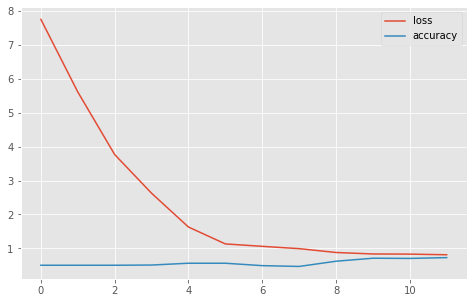

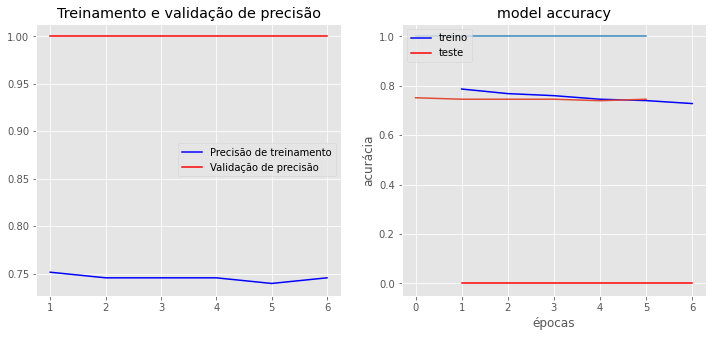

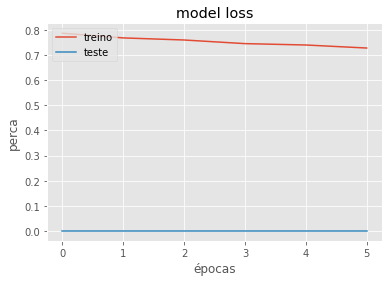

In [6]:
import matplotlib.pyplot as plot
from plot_history_helper import plot_history
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)

# Treinando o modelo.
history = model.fit(
  X_train,
  y_train,
  epochs=12,
  verbose=2,
)

# Mostrando resultados do treinamento com dataset de train.
pd.DataFrame(history.history).plot(figsize=(8,5))
plot.show()


# Treinando o modelo.
history = model.fit(
  X_train,
  y_train,
  epochs=12,
  verbose=False,
  validation_data=(X_test, y_test),
  batch_size=24,
  callbacks =[earlystopping]
)

plot_history(history)
print()

### Realizando a Avaliação do modelo utilizando os dados de teste.

In [7]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Previsão no teste: {accuracy}")

6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Previsão no teste: 1.0


</hr>

## > Resultado

### Com um dataset de tamanho pequeno, foi possível encontrar um modelo de previsão de 100% na detecção de dados sensíveis.
### Agora será testado 10 módelos e feito a média entre eles para verificar se o modelo e os métodos utilizados foram feitos de maneira correta.

### Criando 10 modelos e pegando 10 pedaços do dataset para comparar precisão entre os modelos Sequenciais

In [14]:
import matplotlib.pyplot as plot
import numpy as np
import random
from plot_history_helper import plot_history
from keras import callbacks
from sklearn.model_selection import StratifiedKFold


# Seed fix para poder reproduzir o "teste".
seed = random.randint(0, 100)
np.random.seed(seed)

X = pd.read_csv("./dados_sensiveis.csv")
X.fillna(X.mean(), inplace=True, numeric_only=None)

#X = pd.read_csv("./dados_sensiveis_teste.csv")
#X.fillna(X.mean(), inplace=True)

columns = list(X)

# Categorizando.
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = pd.Categorical(pd.factorize(X[i])[0])

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = le.fit_transform(X[i])

y = X["tipo de dado"]
X.drop(["tipo de dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X = X.values
y = y.values

print(X, x_size)

# Pegando 10 cortes do dataset original de maneira aleatória.
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores:list = []
# Criando 10 modelos com 10 datasets cortados pegos do dataset original e depois comparando os resultados.
list_of_models:list = []
for train, test in kfold.split(X, y):
  clear_session()
  #print(test, train)
  # Salvando os melhores pesos.
  earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
  # modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
  input_dim = X.shape[1]
  model = keras.Sequential()
  model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  # Configurando o modelo de treinamento.
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary() # Mostra os paramestros disponíveis para treinar
  #Treinando o modelo.
  history = model.fit(
    X[train],
    y[train],
    epochs=12,
    verbose=0,
  )
  scores = model.evaluate(X[test], y[test], verbose=0)
  #loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  list_of_models.append((model, (scores[1] * 100)))
for model, score in list_of_models:
  print(model, score)
print("Média: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

[[  0   0   0]
 [  1   1   1]
 [  2   2   2]
 ...
 [979  89 868]
 [980 555 869]
 [981 556 870]] 507
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_6900\3009623557.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


accuracy: 59.00%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
accuracy: 87.00%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 den

### Selecionando o melhor modelo Sequencial dos 10 criados.

In [15]:
maximum = 0
for k, v in list_of_models:
  #print(k, v)
  if v > maximum:
    maximum = v
    m = k
model = m
best_score = maximum

print("Melhor modelo com a maior avaliação escolhida:")
print(model, best_score)

Melhor modelo com a maior avaliação escolhida:
<keras.engine.sequential.Sequential object at 0x00000292D7E81300> 93.99999976158142


## Olhando o resultado acima, podemos dizer que o modelos criados possuem um desempenho relativamente bom, considerando que a média esperada é de 70% até 90%.

## > Avaliação do ultimo modelo criado no loop modelo.

### Criando o dataset.

In [18]:
# CRIANDO UM DATASET COM DADOS ALEATÓRIOS.
#sensitive_data_gen.write_csv_data_random_no_result(name="dados_sensiveis_mix_sem_resultado.csv", title=['Dado A', 'Dado B', 'Dado C', ''], size=1000)
sensitive_data_gen.write_csv_data_sensitive_only_without_result(name="dados_sensiveis_sem_resultado.csv", title=['Dado A', 'Dado B', 'Dado C'], size=1000)

### Carregando um dataset médiano para avaliar o ultimo modelo criado no loop.

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Leitura da dataset.
X = pd.read_csv("./dados_sensiveis_sem_resultado.csv")
X.fillna(X.mean(), inplace=True)

columns = list(X)
print(columns)

# Categorizando.
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = pd.Categorical(pd.factorize(X[i])[0])

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = le.fit_transform(X[i])

scalar = MinMaxScaler()
scalar.fit(X)
#X = scalar.transform(X)

#X.drop(["tipo de dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X = X.values

print(X, x_size, "\n")
model.summary()

['Dado A', 'Dado B', 'Dado C']
[[               0 4753384137716485                0]
 [               1 4009258153493868                1]
 [               2  213112268589443                2]
 ...
 [             972    4010195413385              996]
 [             973 2347139396381729              997]
 [             974 3570599189617173              998]] 507 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_____________________

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_6900\3304429762.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


### Avaliando o modelo com o dataset novo.

### Verificando a previsão com os valores reais

In [37]:
import matplotlib.pyplot as plt

predict_x=model.predict(X) 
classes_x=np.argmax(predict_x, axis=1)
for i in range(12):
	print(f"X={X[i]}\nPrevisão={predict_x[i]}")
print(X, x_size)



32/32 [==============================] - 0s 1ms/step
X=[               0 4753384137716485                0]
Previsão=[1.]
X=[               1 4009258153493868                1]
Previsão=[1.]
X=[              2 213112268589443               2]
Previsão=[1.]
X=[           3 676338270140            3]
Previsão=[1.]
X=[               4 3543447379485510                4]
Previsão=[1.]
X=[            5 4239667385124             5]
Previsão=[1.]
X=[             6 30549871901245              6]
Previsão=[1.]
X=[               7 3598412400945688                7]
Previsão=[1.]
X=[          8 60475763227           8]
Previsão=[1.]
X=[               9 3566757395469328                9]
Previsão=[1.]
X=[              10 4817295060267086               10]
Previsão=[1.]
X=[              11 2717329530950826               11]
Previsão=[1.]
[[               0 4753384137716485                0]
 [               1 4009258153493868                1]
 [               2  213112268589443                2]
 .

In [38]:
# Vendo versão final do resultado.
#clear_session()

loss, accuracy = model.evaluate(X, predict_x, verbose=2)
print(f"Previsão no teste: {accuracy}")

32/32 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 57ms/epoch - 2ms/step
Previsão no teste: 1.0


## Salvando o modelo na pasta models

In [27]:
filepath = "./model"
model.save(filepath)
keras.models.load_model(filepath)

INFO:tensorflow:Assets written to: ./model\assets
